### Задача

Необходимо проанализировать данные интернет-магазина:
подготовить список гипотез для увеличения выручки по приоритетам, запустить A/B-тест и проанализировать результаты.

### Часть 1. Приоритизация гипотез

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
Задача:
Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [1]:
import pandas as pd
import numpy as np
import math as mth
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import datetime as dt

pd.options.display.float_format = '{:.2f}'.format

In [2]:
try: 
    hypothesis = pd.read_csv('hypothesis.csv') # гипотезы
    visitors = pd.read_csv('visitors.csv' ) # пользователи
    orders = pd.read_csv('orders.csv') # заказы
    
except FileNotFoundError:
    
    visitors = pd.read_csv('/datasets/visitors.csv' ) #яндексовский путь
    orders = pd.read_csv('/datasets/orders.csv') 
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
hypothesis #  9 гипотез по увеличению выручки интернет-магазина с указанными параметрами.

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
hypothesis.columns = hypothesis.columns.str.lower()

#### Задача 1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета. 

In [5]:
hypothesis['ICE']=hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis=hypothesis.sort_values(by='ICE', ascending=False).reset_index(drop=True) # сделаем индекс по рейтингу ICE
hypothesis

,hypothesis,reach,impact,confidence,efforts,ICE
0,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20
1,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33
2,Добавить форму подписки на все основные страни...,10,7,8,5,11.20
3,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00
4,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00
5,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00
6,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33
7,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12
8,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00


#### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [6]:
hypothesis['RICE']=(hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
hypothesis=hypothesis.sort_values(by='RICE', ascending=False).reset_index(drop=True) 

In [7]:
with pd.option_context('display.precision', 2):
    hypothesis_gradient=hypothesis.style.background_gradient(cmap = 'Blues')
hypothesis_gradient

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11,1.1e+02
1,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7,56
2,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13,40
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8,40
4,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16,16
5,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9
6,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2,4
7,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1,3


#### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Мы рекомендуем придерживаться приоритизации гипотез полученной фреймворком RICE, так как он включает те же компоненты что и ICE, плюс учитывает охват, т.е. скольких пользователей затронет извенение. Поэтому, будем руководствоваться последним списком. Однако, ниже расммотрим оба списка и дадим комментарии по подсчету фреймворков. 

Сначала, при применении фреймворка ICE, наивысший приоритет был у гипотезы "Запустить акцию, дающую скидку на товар в день рождения", затем "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" и на третьем месте "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

Заметим, что фреймворк ICE имеет три компоненты - это произведение Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта и Confidence — уверенности, что это изменение повлияет на пользователей именно так, разделенное на Efforts — сколько стоит протестировать эту гипотезу.
RICE добавляет к этому еще одну компонету в числитель - Reach — скольких пользователей затронет изменение. 

Поэтому проранжировав гипотезы по RICE список приоритетов изменился - на первое место встала гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" (в списке ICE она на тетьем месте)  - она охватывает максимум пользователей, а лидер ICE, гипотеза о скидке в день рождения, имеет минимальный охват и опустилась до 5 места в новом рейтинге. На втором месте в рейтинге по RICE, - "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа", у нее также выскоий охват пользователей при невыскойо затратности. На третьем месте та же гипотеза, что в ICE на втором -  "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", с низким Reach - охватом пользователей, тем не менее, у нее макимальный Impact и очень высокий Confidence, т.е. мы предполагаем что это изменение 
сильно повлияет на пользователей и их опыт, и наша уверенность в этом высока.

## Часть 2. Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
Проанализируйте A/B-тест:

### Подготовка данных

Посмотрим на данные, которые есть в нашем распоряжении, произведем необходимые манипуляции прежде, чем приступить к работе.

In [8]:
# получим информацию о датасетах
for df in [visitors, orders]:
    df.info()#вывод общей информации
    display(df.sample(10, random_state=1)) # вывод 10 рандомных строк
    print(df.isna().mean()) # вывод среднего количества пропущенных значений
    print('duplicates:', df.duplicated().sum()) # вывод количества дубликатов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
21,2019-08-22,A,609
52,2019-08-22,B,650
38,2019-08-08,B,654
24,2019-08-25,A,621
2,2019-08-03,A,507
41,2019-08-11,B,721
60,2019-08-30,B,490
50,2019-08-20,B,560
35,2019-08-05,B,707
44,2019-08-14,B,746


date       0.00
group      0.00
visitors   0.00
dtype: float64
duplicates: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
886,51443164,4278982564,2019-08-05,24744,A
1093,3894437543,276558944,2019-08-12,5050,A
801,504373597,2604012846,2019-08-05,890,B
189,4189935502,1648269707,2019-08-17,290,B
808,2344401705,366673373,2019-08-05,1460,A
480,1954636284,2600415354,2019-08-06,1530,B
202,532398042,1306302251,2019-08-23,1498,A
311,3567356314,3077396270,2019-08-24,4195,B
866,707525727,1270030113,2019-08-30,3290,B
752,237002862,1398592185,2019-08-20,390,A


transactionId   0.00
visitorId       0.00
date            0.00
revenue         0.00
group           0.00
dtype: float64
duplicates: 0


In [9]:
# преобразование данных о времени
visitors['date'] = pd.to_datetime(visitors['date']) 
orders['date'] = pd.to_datetime(orders['date'])

In [10]:
# минимальная и максимальная дата
print("минимальная дата в датасете visitors:", visitors['date'].min())
print("максимальная дата в датасете visitors:", visitors['date'].max())
print("в датасете visitors есть данные по количеству дней, равному",visitors['date'].nunique())

минимальная дата в датасете visitors: 2019-08-01 00:00:00
максимальная дата в датасете visitors: 2019-08-31 00:00:00
в датасете visitors есть данные по количеству дней, равному 31


In [11]:
# минимальная и максимальная дата
print("минимальная дата в датасете orders:", orders['date'].min())
print("максимальная дата в датасете orders:", orders['date'].max())
print("в датасете orders есть данные по количеству дней, равному", orders['date'].nunique())

минимальная дата в датасете orders: 2019-08-01 00:00:00
максимальная дата в датасете orders: 2019-08-31 00:00:00
в датасете orders есть данные по количеству дней, равному 31


Наш тест проводился в августе 2019, с 1 по 31 августа включительно и у нас есть данные по всем дням.

In [12]:
orders_grouped=orders.groupby(['visitorId','group']).agg(
    {'revenue': 'sum','date':'first', 'visitorId':'count'}).rename(
    columns={'visitorId': 'purchases'}).sort_values(by='purchases', ascending=False).reset_index()
orders_grouped.head(5)

,visitorId,group,revenue,date,purchases
0,4256040402,A,48800,2019-08-01,7
1,2458001652,B,29289,2019-08-25,6
2,2038680547,A,8570,2019-08-22,5
3,2378935119,B,79369,2019-08-25,5
4,2458001652,A,32809,2019-08-22,5


Проверим, не появляются ли покупатели в разных группах теста, по идее они не должны повторяться

In [13]:
orders_grouped['visitorId'].duplicated().value_counts() 

False    1031
True       58
Name: visitorId, dtype: int64

Мы обнаружили 58 повторений visitorId, т.е. есть 58 покупателей попавших в обе группы теста. Изучим их поподробнее.

In [14]:
orders_dublicated=orders_grouped[orders_grouped['visitorId'].duplicated(keep=False)].sort_values(
    ['visitorId', 'date']).reset_index(drop=True)
orders_dublicated

,visitorId,group,revenue,date,purchases
0,8300375,B,10510,2019-08-01,1
1,8300375,A,1790,2019-08-07,1
2,199603092,B,3488,2019-08-02,1
3,199603092,A,19692,2019-08-15,4
4,232979603,A,60,2019-08-31,1
...,...,...,...,...,...
111,4186807279,B,32300,2019-08-21,2
112,4256040402,A,48800,2019-08-01,7
113,4256040402,B,127690,2019-08-16,4
114,4266935830,A,78990,2019-08-29,1


In [15]:
purch_dublictated = orders_dublicated['purchases'].sum()/orders_grouped['purchases'].sum()
print('доля покупок, которые приходятся на покупателей, оказавшихся в обеих группах теста: {:.2%} '.format(purch_dublictated))

доля покупок, которые приходятся на покупателей, оказавшихся в обеих группах теста: 15.12% 


In [16]:
revenue_dublicated = orders_dublicated['revenue'].sum()/orders_grouped['revenue'].sum()
print('доля выручки, которая приходятся на покупателей, оказавшихся в обеих группах теста: {:.2%}'.format(revenue_dublicated))

доля выручки, которая приходятся на покупателей, оказавшихся в обеих группах теста: 15.60%


Изучим, сколько покупателей были зафиксированы в разных группах в один и тот же день

In [17]:
orders_date_dublicated=orders_dublicated[orders_dublicated.duplicated(
    subset=['visitorId','date'])].reset_index(drop=True)
orders_date_dublicated.count()

visitorId    15
group        15
revenue      15
date         15
purchases    15
dtype: int64

In [18]:
# подготовим данные о покупателях без дубликатных покупателей
orders_clean=orders.query('visitorId not in @orders_dublicated.visitorId')
orders_clean

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


In [19]:
# проверим сходятся ли расчеты
print('total customers in dataset "orders":', orders['visitorId'].nunique())
print('total customers after cleaning:', orders_clean['visitorId'].nunique())
print('total customers after cleaning + 58 dublicated customers:', orders_clean['visitorId'].nunique() + 58)

total customers in dataset "orders": 1031
total customers after cleaning: 973
total customers after cleaning + 58 dublicated customers: 1031


In [20]:
# подготовим данные о покупках дубликатных покупателей по группам и дням, которые нужно будет вычесть из визитов
orders_dublicated_for_clean=orders_dublicated.groupby(['date','group']).agg({'purchases': 'sum'}).reset_index()
orders_dublicated_for_clean.head()

,date,group,purchases
0,2019-08-01,A,7
1,2019-08-01,B,6
2,2019-08-02,A,1
3,2019-08-02,B,1
4,2019-08-03,B,3


In [21]:
# откорректируем датасет visitors 
visitors_clean=visitors.merge(orders_dublicated_for_clean, how='left', on=['date','group']).fillna(0)
visitors_clean['visitors_clean']=visitors_clean['visitors']-visitors_clean['purchases']
visitors_clean=visitors_clean.drop(columns=['visitors', 'purchases'])
visitors_clean['visitors']=visitors_clean['visitors_clean'].astype('int')
visitors_clean=visitors_clean.drop(columns=['visitors_clean'])
visitors_clean

,date,group,visitors
0,2019-08-01,A,712
1,2019-08-02,A,618
2,2019-08-03,A,507
3,2019-08-04,A,715
4,2019-08-05,A,754
...,...,...,...
57,2019-08-27,B,716
58,2019-08-28,B,645
59,2019-08-29,B,527
60,2019-08-30,B,488


Мы подготовили данные, убрав из них пользователей, попавших в обе группы теста. Будем использовать таблицы visitors_clean и orders_clean. Если нам подадобится включить в анализ дупликаты, мы всегда можем воспользоваться оригинальными таблицами.

### Подготовка кумулятивных таблиц

In [22]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders_clean[['date','group']].drop_duplicates()

In [23]:
# получаем агрегированные кумулятивные данные данные о заказах по дням 
ordersAggregated = datesGroups.apply(
    lambda x: orders_clean[np.logical_and(
        orders_clean['date'] <= x['date'], orders_clean['group'] == x['group'])].agg(
        {'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(
    by=['date','group'])

In [24]:
ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
...,...,...,...,...,...
533,2019-08-29,B,510,490,4746610
757,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656


In [25]:
# попробуем сделать то же самое через cumsum
orders_clean_grouped=orders_clean.groupby(
    ['date', 'group']).agg({'revenue' : 'sum','transactionId' : 'nunique', 'visitorId':'nunique'}).reset_index()

In [26]:
#orders_clean_grouped['new']=orders_clean_grouped['revenue'].cumsum()
orders_clean_grouped['revenue_cumsum']=orders_clean_grouped.groupby(['group'])['revenue'].cumsum()
orders_clean_grouped['transactionId_cumsum']=orders_clean_grouped.groupby(['group'])['transactionId'].cumsum()
orders_clean_grouped['visitorId_cumsum']=orders_clean_grouped.groupby(['group'])['visitorId'].cumsum()
orders_clean_grouped

,date,group,revenue,transactionId,visitorId,revenue_cumsum,transactionId_cumsum,visitorId_cumsum
0,2019-08-01,A,142779,23,19,142779,23,19
1,2019-08-01,B,59758,17,17,59758,17,17
2,2019-08-02,A,91602,19,18,234381,42,37
3,2019-08-02,B,162043,23,22,221801,40,39
4,2019-08-03,A,112473,24,24,346854,66,61
...,...,...,...,...,...,...,...,...
57,2019-08-29,B,106100,15,15,4746610,510,506
58,2019-08-30,A,78180,9,8,3311413,460,449
59,2019-08-30,B,209223,21,21,4955833,531,527
60,2019-08-31,A,53243,8,8,3364656,468,457


*Примечание 
Мы сделали таблицу с кумулятивными о заказах по дням двумя способами, как в тренажере, через lambda, и, воспользовавшись методом cumsum. Результаты получились одинаковые кроме столбца с кумулятивнями visitorId. Во второй таблице, у нас есть исходные данные, и мы видим, что кумулятивная сумма количества покупателей считается корректно. Скорее всего, в варианте с lambda расхождение связано с pd.Series.nunique - если какой-то покупатель повторился в разные дни, то он будет посчитан только один раз, так как это nunique, а в случае с cumsum он посчитался, т.к. он был уникум в разные дни. На конец месяца, мы видим, что разнца не слишком велика, но тем не менее она есть.

In [27]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors_clean[np.logical_and(visitors_clean['date'] <= x['date'], visitors_clean['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,712
66,2019-08-01,B,707
175,2019-08-02,A,1330
173,2019-08-02,B,1287
291,2019-08-03,A,1837
...,...,...,...
533,2019-08-29,B,17620
757,2019-08-30,A,17950
690,2019-08-30,B,18108
958,2019-08-31,A,18647


In [28]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.tail()

,date,group,orders,buyers,revenue,visitors
57,2019-08-29,B,510,490,4746610,17620
58,2019-08-30,A,460,437,3311413,17950
59,2019-08-30,B,531,511,4955833,18108
60,2019-08-31,A,468,445,3364656,18647
61,2019-08-31,B,548,528,5068972,18824


### Анализ A/B-теста

#### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения

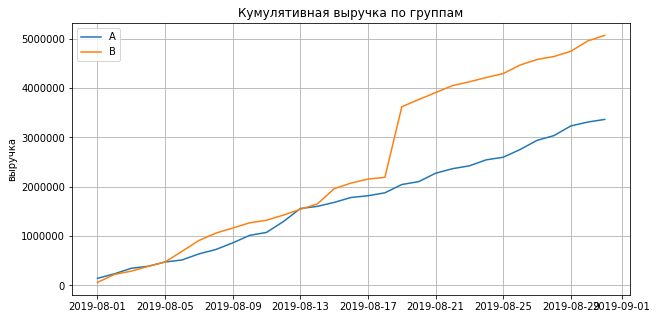

In [50]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим графики выручки по обоим группам 
plt.figure(figsize=(10,5))
plt.grid()

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.ylabel('выручка')
plt.title('Кумулятивная выручка по группам')
#plt.axis([cumulativeRevenueB['date'].min(), cumulativeRevenue['date'].max(), cumulativeRevenue['revenue'].min(),cumulativeRevenueB['revenue'].max()]) 
plt.show()

Группа В начинает опережать группу А по кумулятивным выручкам с пятого дня (пятого августа 2019), сраниваясь на 13-ый день и после этого опережая постоянно. Около 18-ого дня происходит сильный скачок в выручке, сокрее всего, там была какая-то очень крупная покупка или же всплеск в заказах. Вероятно, это выброс, после которого группа В так сильно оторвалась. После этого дня выручка почти равномерно увеличивается в течение всего теста в обеих группах.
Необходимо будет обратить внимание на выбросы.

Посмотрим на выручку по датам в районе "всплеска".

In [30]:
orders_clean.query('"2019-08-17" < date < "2019-08-20"').sort_values(by='revenue', ascending=False).head(5)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
530,3970235543,2912540959,2019-08-19,43990,A
527,1570513684,2837914161,2019-08-19,33405,B
421,3765974140,1357170471,2019-08-19,31680,A
461,2683113224,154576532,2019-08-19,26550,B


Мы видим, что 19 августа в группе В была совершена покупка с очень высокой стоимостью 1294500 у.е. Чтобы понять, насколько именно она велика, рассмотрим характеристики выручки по каждой трансакцию за весь период.

In [31]:
orders_clean['revenue'].describe()

count      1016.00
mean       8300.81
std       42121.99
min          50.00
25%        1190.00
50%        2955.00
75%        8134.25
max     1294500.00
Name: revenue, dtype: float64

Теперь мы видим, что это покупка в 1294500 у.е. была самой дорогой за весь период, при медианном среднем покупки 2955 и арифметическом в 8300. Данная покупка является выбросом, скосившим наш график и в будущем будет удалена из анализа.

#### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

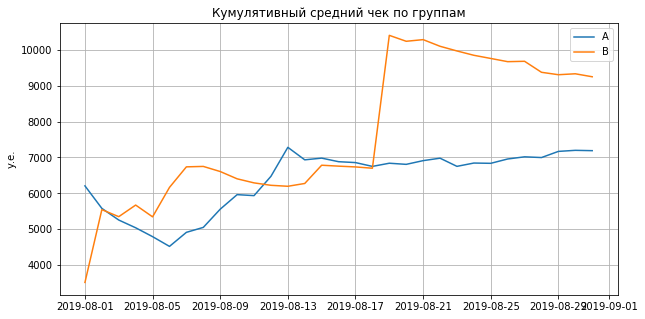

In [32]:
# Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.ylabel('у.е.')
plt.title('Кумулятивный средний чек по группам')
plt.show()

Средний чек становится равномерным в группе А ближе к концу теста (после 13 августа). Для группы кривая более скачкообразная - устанавливается первый раз в районе 7 числа, очень плавно снижается, около 11 снановясь ниже чем кривая А, но потом
переживает очень резкий скачок после 18-ого августа, а после 21-ого очень плавно снижается. Снова возникает предположение, что в группу B 19 августа попали очень крупные заказы (резкий всплеск на графике, изменение сразу на 3 тысячи у.е., если говорить грубо, то скачок за день был почти на 50%). 

#### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

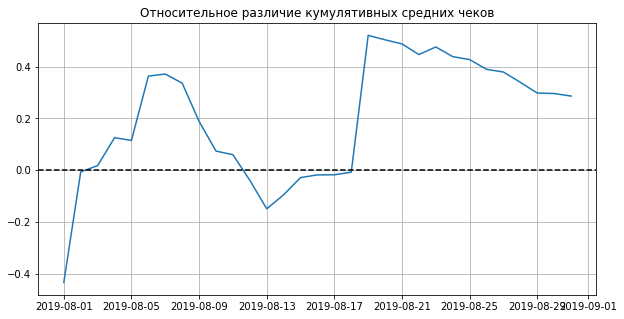

In [33]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--') # добавляем ось X
plt.title('Относительное различие кумулятивных средних чеков')
plt.show()

В нескольких точках график относительного различия для среднего чека резко «скачет». Эти скачки показывают, когда произошли крупные заказы, т.е. выбросы, опять-таки 7 и 19 августа.

Из-за "скачков" и обнаруженных выбросов мы не можем утверждать о фиксированном и стабильном преимуществе группы В над А по средним чекам. Однако в большинстве дней кривая находится выше нуля, т.е. средний чек группы В был выше, чем средний чек группы А. Таким образом, мы можем предположить о преимуществе В над А по среднем чекам.

#### Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

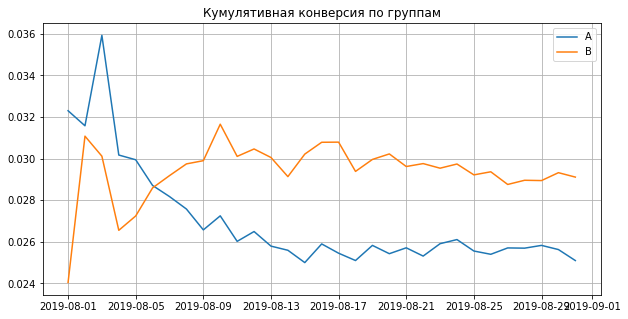

In [34]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группам
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Кумулятивная конверсия по группам')
plt.show()

Вначале обе группы колебались и конверсия А была выше. Однако после 6 августа конверсия группы В вырвалась вперёд и зафиксировалась к середине месяца, а конверсия группы А просела и также зафиксировалась начиная с того же периода.

Такое положение кривых позволяет нам с уверенностью предолагать, что конверсия в группе В стабильно лучше, чем конверсия в группе А.

#### Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

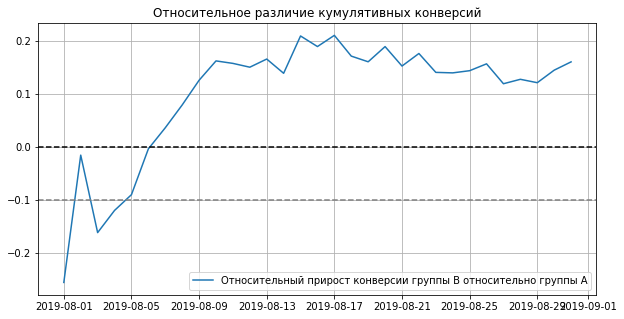

In [35]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,5))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.title('Относительное различие кумулятивных конверсий')
plt.show()

В начале теста группа B проигрывала группе A, затем, после 6 августа, резко вырвалась вперёд. После этого её конверсия была скороее равномерна, подвергаясь небольшим колебаниям, будучи все время лучше, чем у А.

#### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [36]:
ordersByUsers = (
    orders_clean.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['userId', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


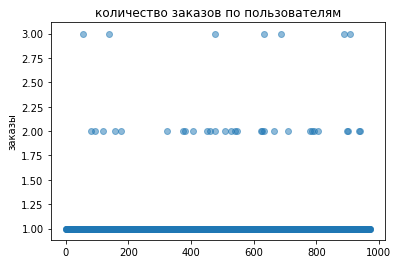

In [37]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'], alpha=0.5)
plt.title('количество заказов по пользователям')
plt.ylabel('заказы')
plt.show()

На точечной диаграмме хорошо видно, что большинство покупателей совершали покупку только один раз, но тех кто заказывал дважды тоже наблюдается некоторое количество. Тех кто совершал три покупки, совсем мало. Больше трех покупок не совершал никто.

#### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [38]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


95% пользователей сделали 1 заказ, 99% сделали не более двух заказов. Будем считать за границу 99-ый процентиль, тогда тех, кто совершил более двух покупок будем считать аномалией  (т.е. будем считать аномальными тех, кто совершил три покупки, больше трех не совершал никто).

#### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

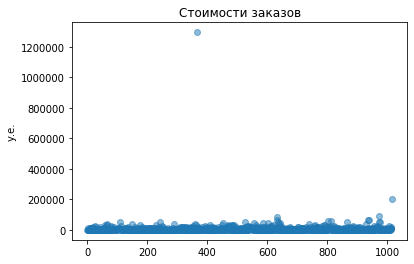

In [39]:
x_values = pd.Series(range(0,len(orders_clean['revenue'])))
plt.scatter(x_values, orders_clean['revenue'], alpha=0.5)
plt.title('Стоимости заказов')
plt.ylabel('у.е.')
plt.show()

По графику видно, что дорогих заказов очень мало. По графику можно выбрать границу аномальных заказов между 20 000 и 40 000 рублей. Однако принято отсеивать от 1% до 5% наблюдений с крайними значениями. Один заказ, более 1.2 млн, полностью оторван от остальных, и еще один около 200 тысяч, остальные же меньше 100 тысяч у.е.

####  Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [40]:
print(np.percentile(orders_clean['revenue'], [95, 99]))

[26785. 53904.]


95% заказов имеют стоимость не дороже 26785, а 99% стоили не дороже 53904. Будем считать аномальной стоимость более 53904.

####  Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

Здесь мы проверим, есть ли разница между конверсиями групп А и В, и имеет ли эта разница статистическую значимость. 

Нулевая гипотеза, которую мы будем проверять: по "сырым" данным нет статистически значимого различия между конверсиями групп А и В.

In [41]:
# подготовим данные
visitorsADaily = visitors_clean[visitors_clean['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors_clean[visitors_clean['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders_clean[orders_clean['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders_clean[orders_clean['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,712,707,712,707
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,618,580,1330,1287
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,506,1837,1793
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,715,768,2552,2561
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,754,706,3306,3267


In [42]:
# Создадим переменные ordersByUsersA и ordersByUsersB. 
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.
ordersByUsersA = (
    orders_clean[orders_clean['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders_clean[orders_clean['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

In [43]:
# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [44]:
# Применим критерий и отформатируем p-value, 
#  добавим alternative='two-sided' т.к. в зависимсти от версии scipy, default может отличаться
print("P-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative='two-sided')[1]))

# Выведем относительный прирост конверсии группы B:
print("Относительный прирост конверсии группы B: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.011
Относительный прирост конверсии группы B: 0.160


Вывод: По «сырым» данным мы наблюдаем различия в конверсии групп A и B.

P-value меньше 0.05.
Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, мы отвергаем. Т.е. статистические различия в конверсии есть. Относительный выигрыш в коверсии группы B равен 16%.

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Здесь мы проверим, есть ли разница между средними чеками групп А и В, и имеет ли эта разница статистическую значимость. 

Нулевая гипотеза, которую мы будем проверять: по "сырым" данным нет статистически значимого различия между средними чеками групп А и В.

In [45]:
print('P-value: {0:.3f}'.format(stats.mannwhitneyu(orders_clean[orders_clean['group']=='A']['revenue'], orders_clean[orders_clean['group']=='B']['revenue'],alternative='two-sided',)[1]))
print('Относительное различие в среднем чеке группы B от группы А: {0:.3f}'.format(orders_clean[orders_clean['group']=='B']['revenue'].mean()/orders_clean[orders_clean['group']=='A']['revenue'].mean()-1))

P-value: 0.829
Относительное различие в среднем чеке группы B от группы А: 0.287


Вывод: По «сырым» данным мы не можем сказать, что есть различия в средних чеках группы A и B.
P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Заметим, что средний чек группы B значительно выше среднего чека группы A, на это скорее всего повлияли выбросы. 

#### Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

Нулевая гипотеза, которую мы будем проверять: по «очищенным» данным нет статистически значимого различия между конверсиями групп А и В.

In [46]:
# Узнаем, сколько всего аномальных пользователей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 53904]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
Name: visitorId, dtype: int64
(20,)


Отфильтруем аномально большие заказы и аномальное количество заказов, согласно предыдущим подсчетам по процентилям, в обоих случаях оставив до 99 процентиля. Тогда аномальных пользователей получается 23, это те, кто сделал более 2-х зкаказов и те, чья стоимость заказа была 53904 или больше.

In [47]:
# подготовим выборки количества заказов по пользователям по группам теста:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [48]:
# Применим статистический критерий Манна-Уитни к полученным выборкам:
print('P-value: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative='two-sided')[1]))
print('Относительный прирост конверсии группы B: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.007
Относительный прирост конверсии группы B: 0.189


Вывод: По «очищенным» данным данным мы также наблюдаем различия в конверсии групп A и B.

P-value снова меньше 0.05 (оно стало еще меньше, чем было). Снова отвергаем нулевую гипотезу, о том, что статистически значимых различий в конверсии между группами нет. Статистические различия в конверсии есть. После того, как мы избавились от аномалий, относительный выигрыш в коверсии группы B немного вырос, - с 16 до 19%.

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Нулевая гипотеза, которую мы будем проверять: по "очищенным" данным нет статистически значимого различия между средними чеками групп А и В.

In [49]:
print("P-value:",
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders_clean[
                np.logical_and(
                    orders_clean['group'] == 'A',
                    np.logical_not(orders_clean['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders_clean[
                np.logical_and(
                    orders_clean['group'] == 'B',
                    np.logical_not(orders_clean['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'], alternative='two-sided'
        )[1]
    )
)

print('Относительное различие в среднем чеке группы B от группы А:'
    "{0:.3f}".format(
        orders_clean[
            np.logical_and(
                orders_clean['group'] == 'B',
                np.logical_not(orders_clean['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders_clean[
            np.logical_and(
                orders_clean['group'] == 'A',
                np.logical_not(orders_clean['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value: 0.788
Относительное различие в среднем чеке группы B от группы А:-0.032


Вывод: По очищенным данным, так же как и по «сырым» мы не можем утверждать, что есть различия в средних чеках группы A и B. 
P-value снова значительно больше 0.05. Значит, у нас нет причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия. Интересно, что после "очистки" средний чек группы B стал даже немного ниже среднего чека группы A. Видимо, на группу В пришлось больше аномальных пользователей, из-за которы чек по В казался выше.

Посмотрим, что будет, если мы "очистим" данные до 95 процентиля от аномальных покупателей и покупок (т.е. больше 2 покупок и стоимостью 26785 и более).

#### Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

Основываясь на предыдущем анализе, мы можем принять решение об остановке теста, зафиксировав победу группы В в конверсии и отсутствие различий между группами по среднему чеку.
- На графике кумулятивной коверсии и относительных различий кумулятивной конверсии мы видим, что конверсии обеих групп зафиксировалась начиная с середины месяца, и с того же момента замента постоянная разница между группами. Результаты конверсий стабильны, и после применения критерия Манна-Уитни мы можем утверждать о статистической значимости различий в конверсии: конверсия группы В выше конверсии группы А.
- Что касается среднего чека, на графиках по кумулятивных средним чекам мы наблюдали скачки, вызванные аномалиями, и отсутсвие ярковыраженной и стабильной разницы. Даже отбросив аномалии, после применения критерия Манна-Уитни для оценки различий,  мы не смогли отвергнуть гипотезу о равенстве средних чеков, т.е. мы не можем говорить о победе одной из групп. Таким образом, остается зафиксировать отсутствие различий между группами по среднему чеку. Продолжение теста в данном случае не предстваляется перспективным.

Итак мы можем утверждать, что тест стоит оставновить. По его результатам группа В конврертируется лучше группы А, при этом нет разницы в средних чеках. В любом случае это хороший результат, так как он означает, что мы нашли хороший способ превращения просто посетителей в покупателей. То, что при этом не меняется средний чек может быть непосредственно связано со спецификой продукта.